In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import statsmodels.formula.api as sm
import statsmodels.api as sm1

#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df3 = pd.read_csv('/content/drive/MyDrive/DS4A - Proyecto/data/PIB_municipio.csv', sep=';', encoding='latin-1')
#df4 = pd.read_csv('/content/drive/MyDrive/DS4A - Proyecto/data/Agropecuario.csv')
dataMineria = pd.read_csv('res\data\mineriaMunicipio.csv')
dataIrca = pd.read_csv('res\data\Irca_Departamnetos.csv', sep=';', encoding='latin-1')
#print(df4.columns)
#df4['PERIODO'].unique()

In [7]:
dataIrca2 = dataIrca.rename(columns={'IRCA Promedio 2019':'IRCA'})

dataMineria2 = dataMineria.groupby(['Municipio Productor', 'Departamento', 'Recurso Natural','Año Produccion', 'Unidad Medida'])['Cantidad Producción'].sum().reset_index()

In [8]:
dataIrca2['Municipio'] = dataIrca2['Municipio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dataMineria2['Municipio Productor'] = dataMineria2['Municipio Productor'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dataIrca2['Departamento'] = dataIrca2['Departamento'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dataMineria2['Departamento'] = dataMineria2['Departamento'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [9]:
dataIrca2

,Año,Departamento,Divi_dpto,Municipio,Divi_muni,IRCA,Categoría
0,2010,Antioquia,5,Medellin,5001,1.44,Sin riesgo
1,2010,Antioquia,5,Abejorral,5002,25.44,Medio
2,2010,Antioquia,5,Abriaqui,5004,16.52,Sin riesgo
3,2010,Antioquia,5,Alejandria,5021,2.94,Sin riesgo
4,2010,Antioquia,5,Amaga,5030,35.72,Medio
...,...,...,...,...,...,...,...
10497,2016,Valle del Cauca,76,Zarzal,76895,2.60,Bajo
10498,2016,Boyaca,15,Zetaquira,15897,49.40,Medio
10499,2016,Cundinamarca,25,Zipacon,25898,47.80,Medio
10500,2016,Cundinamarca,25,Zipaquira,25899,1.10,Bajo


In [10]:
new_df = pd.merge(dataIrca2, dataMineria2,  how='left', left_on=['Año','Municipio','Departamento'], right_on = ['Año Produccion','Municipio Productor','Departamento'])
new_df2 = new_df.dropna()
new_df2 = new_df2.reset_index(drop=True)
new_df2 = new_df2.rename(columns={'Cantidad Producción':'Cantidad', 'Recurso Natural':'Recurso', 'Unidad Medida':'Unidad'})
#new_df2 = new_df2[new_df2['IRCA'] > 0]
#new_df2 = new_df2.reset_index(drop=True)
#print(new_df2['Recurso Natural'].unique())
new_df2 = new_df2.reset_index(drop=True)
new_df5 = new_df2.groupby(['Año','Recurso','Unidad']).agg({'IRCA':'mean', 'Cantidad':'mean'}).reset_index()
new_df5 = new_df5.rename(columns={'Cantidad Producción':'Cantidad', 'Recurso Natural':'Recurso', 'Unidad Medida':'Unidad'})
new_df5

,Año,Recurso,Unidad,IRCA,Cantidad
0,2012,ARCILLA,TONELADAS,16.204211,1113.736842
1,2012,ARCILLAS BENTONITICA,TONELADAS,9.450000,350.000000
2,2012,ARCILLAS CAOLINITICA,TONELADAS,9.564000,817.600000
3,2012,ARCILLAS CERAMICAS,TONELADAS,12.455200,12316.040000
4,2012,ARCILLAS FERRUGINOSAS,TONELADAS,20.360000,24217.478261
...,...,...,...,...,...
412,2019,SERPENTINA EN RAJON,TONELADAS,37.295000,696.000000
413,2019,TALCO,TONELADAS,1.280000,1624.000000
414,2019,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAY...,METROS CUBICOS,5.395000,246.500000
415,2019,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MEN...,METROS CUBICOS,4.420000,408.000000


In [11]:
#new_df3 = new_df2[['Año', 'Municipio', 'IRCA', 'Recurso Natural', 'Cantidad Producción']].dropna()
#new_df3 = new_df3[new_df3['Recurso Natural'].isin(['ORO', 'PLATA', 'COBRE', 'AZUFRE'])]
table = pd.pivot_table(new_df5, values='Cantidad', index=['IRCA'], columns=['Recurso'], aggfunc=np.max)
table = table.reset_index()
table

Recurso,IRCA,ARCILLA,ARCILLAS BENTONITICA,ARCILLAS CAOLINITICA,ARCILLAS CERAMICAS,ARCILLAS FERRUGINOSAS,ARCILLAS MISCELANEAS,ARCILLAS REFRACTARIAS,ARENA DE CANTERA,ARENA DE RIO,...,SERPENTINA (BLOQUE MAYOR O IGUAL A 1 M3),SERPENTINA (BLOQUE MENOR A 1 M3),SERPENTINA (SILICATO DE MAGNESIO),SERPENTINA EN RAJON,TALCO,TANTALIO,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAYOR O IGUAL A 1 M3,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MENOR A 1 M3,VOLFRAMIO,YESO
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,58.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,58.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,60.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,61.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2840.0,NaN


In [ ]:
#plt.plot(new_df6['IRCA'], new_df6['Cantidad'])

In [12]:
new_df5['Recurso'].unique()

array(['ARCILLA', 'ARCILLAS BENTONITICA', 'ARCILLAS CAOLINITICA',
       'ARCILLAS CERAMICAS', 'ARCILLAS FERRUGINOSAS',
       'ARCILLAS MISCELANEAS', 'ARENA DE CANTERA', 'ARENA DE RIO',
       'ARENAS', 'ARENAS NEGRAS', 'ARENAS SILICEAS', 'ASFALTITA',
       'AZUFRE', 'BARITA', 'BASALTO', 'BAUXITA', 'CALIZAS', 'CARBON',
       'CROMO - CROMITA', 'DIABASA', 'DOLOMITA', 'ESMERALDAS',
       'ESMERALDAS EN BRUTO', 'ESMERALDAS ENGASTADA',
       'ESMERALDAS SEMIPRECIOSA', 'ESMERALDAS TALLADAS', 'FELDESPATOS',
       'GRAVA DE CANTERA', 'GRAVAS', 'GRAVAS DE RIO', 'HIERRO',
       'MANGANESO', 'MARMOL', 'MARMOL (BLOQUE MAYOR O IGUAL A 1 M3)',
       'MARMOL (BLOQUE MENOR A 1 M3)', 'NIQUEL', 'ORO', 'PLATA',
       'PLATINO', 'PUZOLANAS', 'RECEBO',
       'ROCA CORALINA (BLOQUE MAYOR O IGUAL A 1 M3)', 'ROCA FOSFORICA',
       'SAL', 'SERPENTINA (SILICATO DE MAGNESIO)', 'SERPENTINA EN RAJON',
       'TALCO',
       'TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAYOR O IGUAL A 1 M3',
       'VOLF

In [13]:
corr_mat  = table[['IRCA', 'ARCILLA', 'ARCILLAS BENTONITICA', 'ARCILLAS CAOLINITICA',
       'ARCILLAS CERAMICAS', 'ARCILLAS FERRUGINOSAS',
       'ARCILLAS MISCELANEAS', 'ARENA DE CANTERA', 'ARENA DE RIO',
       'ARENAS', 'ARENAS NEGRAS', 'ARENAS SILICEAS', 'ASFALTITA',
       'AZUFRE', 'BARITA', 'BASALTO', 'BAUXITA', 'CALIZAS', 'CARBON',
       'CROMO - CROMITA', 'DIABASA', 'DOLOMITA', 'ESMERALDAS',
       'ESMERALDAS EN BRUTO', 'ESMERALDAS ENGASTADA',
       'ESMERALDAS SEMIPRECIOSA', 'ESMERALDAS TALLADAS', 'FELDESPATOS',
       'GRAVA DE CANTERA', 'GRAVAS', 'GRAVAS DE RIO', 'HIERRO',
       'MANGANESO', 'MARMOL', 'MARMOL (BLOQUE MAYOR O IGUAL A 1 M3)',
       'MARMOL (BLOQUE MENOR A 1 M3)', 'NIQUEL', 'ORO', 'PLATA',
       'PLATINO', 'PUZOLANAS', 'RECEBO',
       'ROCA CORALINA (BLOQUE MAYOR O IGUAL A 1 M3)', 'ROCA FOSFORICA',
       'SAL', 'SERPENTINA (SILICATO DE MAGNESIO)', 'SERPENTINA EN RAJON',
       'TALCO',
       'TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAYOR O IGUAL A 1 M3',
       'VOLFRAMIO', 'YESO', 'ARCILLAS REFRACTARIAS', 'COBRE', 'CUARZO',
       'FLUORITA', 'PIEDRA ARENISCA-PIEDRA BOGOTANA',
       'SERPENTINA (BLOQUE MAYOR O IGUAL A 1 M3)',
       'SERPENTINA (BLOQUE MENOR A 1 M3)', 'CARBONATO DE CALCIO',
       'ESTANO', 'GRAVAs DE RIO', 'NIOBIO',
       'ROCA CORALINA (BLOQUE MENOR A 1 M3)',
       'TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MENOR A 1 M3',
       'GRANITO (BLOQUE MAYOR O IGUAL A 1 M3)',
       'MINERAL DE MAGNESIO (MAGNESITA)',
       'MARMOL EN RAJÓN (RETAL DE MÁRMOL)', 'ASBESTO', 'TANTALIO',
       'GRAFITO']].corr()
corr_mat

Recurso,IRCA,ARCILLA,ARCILLAS BENTONITICA,ARCILLAS CAOLINITICA,ARCILLAS CERAMICAS,ARCILLAS FERRUGINOSAS,ARCILLAS MISCELANEAS,ARENA DE CANTERA,ARENA DE RIO,ARENAS,...,GRAVAs DE RIO,NIOBIO,ROCA CORALINA (BLOQUE MENOR A 1 M3),TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MENOR A 1 M3,GRANITO (BLOQUE MAYOR O IGUAL A 1 M3),MINERAL DE MAGNESIO (MAGNESITA),MARMOL EN RAJÓN (RETAL DE MÁRMOL),ASBESTO,TANTALIO,GRAFITO
Recurso,,,,,,,,,,,,,,,,,,,,,
IRCA,1.000000,0.528994,0.290198,0.410445,0.777554,0.110724,-0.363838,0.347054,-0.116824,-0.733876,...,0.49498,0.935708,0.842906,0.497885,NaN,1.0,0.990303,NaN,NaN,NaN
ARCILLA,0.528994,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARCILLAS BENTONITICA,0.290198,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARCILLAS CAOLINITICA,0.410445,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARCILLAS CERAMICAS,0.777554,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MINERAL DE MAGNESIO (MAGNESITA),1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
MARMOL EN RAJÓN (RETAL DE MÁRMOL),0.990303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
ASBESTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


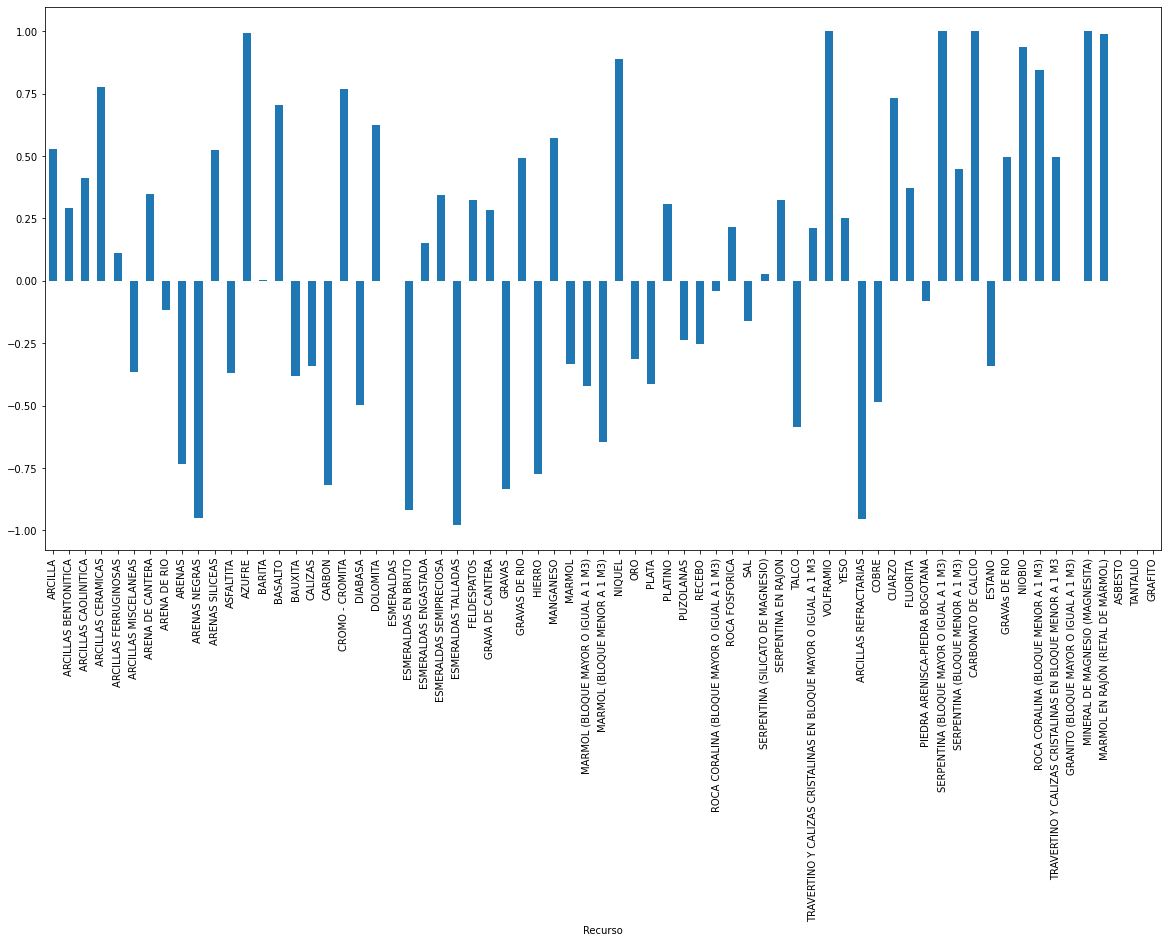

In [ ]:
plt.figure(figsize=(20,10))
corr = corr_mat['IRCA'][1:]
corr.plot.bar()

In [14]:
corr2 = corr_mat['IRCA'][1:].reset_index()
corr3 = corr2[corr2['IRCA'] > 0]['Recurso']

In [15]:
new_df6 = new_df5[new_df5['Recurso'].isin(corr3)]

In [16]:
model1 = 'IRCA ~ (Cantidad) + (Recurso)'
lm1   = sm.ols(formula = model1, data = new_df5).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   IRCA   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6.843
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           9.99e-35
Time:                        18:21:00   Log-Likelihood:                -1454.4
No. Observations:                 417   AIC:                             3049.
Df Residuals:                     347   BIC:                             3331.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [17]:
data2 = lm1.pvalues[1:len(lm1.pvalues)-1][lm1.pvalues[1:len(lm1.pvalues)-1] < 0.05].keys().tolist()
data3 = [i.replace('Recurso[T.', '') for i in data2]
data3 = [i.replace(']', '') for i in data3]
data3.append('ARCILLA')
new_df7 = new_df5[new_df5['Recurso'].isin(data3)]

In [18]:
model2 = 'IRCA ~ Cantidad + C(Recurso)'
lm2 = sm.ols(formula = model1, data = new_df7).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   IRCA   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     17.56
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.29e-24
Time:                        18:21:08   Log-Likelihood:                -414.65
No. Observations:                 121   AIC:                             873.3
Df Residuals:                      99   BIC:                             934.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [19]:
new_df5['Cantidad'][new_df5['Recurso'] == 'ASFALTITA']

11     2034.250000
62     4492.000000
116    7771.000000
173    6105.000000
231    9129.400000
283    3973.200000
332    3722.333333
377    5792.333333
Name: Cantidad, dtype: float64

In [20]:
lm2.save("model1.pickle")

In [22]:
new_df9 = new_df5.copy()
new_df9 = new_df9.set_index('IRCA')
y = pd.get_dummies(new_df9['Recurso'])
y = y.reset_index()
y

,IRCA,ARCILLA,ARCILLAS BENTONITICA,ARCILLAS CAOLINITICA,ARCILLAS CERAMICAS,ARCILLAS FERRUGINOSAS,ARCILLAS MISCELANEAS,ARCILLAS REFRACTARIAS,ARENA DE CANTERA,ARENA DE RIO,...,SERPENTINA (BLOQUE MAYOR O IGUAL A 1 M3),SERPENTINA (BLOQUE MENOR A 1 M3),SERPENTINA (SILICATO DE MAGNESIO),SERPENTINA EN RAJON,TALCO,TANTALIO,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MAYOR O IGUAL A 1 M3,TRAVERTINO Y CALIZAS CRISTALINAS EN BLOQUE MENOR A 1 M3,VOLFRAMIO,YESO
0,16.204211,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.450000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.564000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.455200,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.360000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,37.295000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
413,1.280000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
414,5.395000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,4.420000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
y.columns

Index(['IRCA', 'ARCILLA', 'ARCILLAS BENTONITICA', 'ARCILLAS CAOLINITICA',
       'ARCILLAS CERAMICAS', 'ARCILLAS FERRUGINOSAS', 'ARCILLAS MISCELANEAS',
       'ARCILLAS REFRACTARIAS', 'ARENA DE CANTERA', 'ARENA DE RIO', 'ARENAS',
       'ARENAS NEGRAS', 'ARENAS SILICEAS', 'ASBESTO', 'ASFALTITA', 'AZUFRE',
       'BARITA', 'BASALTO', 'BAUXITA', 'CALIZAS', 'CARBON',
       'CARBONATO DE CALCIO', 'COBRE', 'CROMO - CROMITA', 'CUARZO', 'DIABASA',
       'DOLOMITA', 'ESMERALDAS', 'ESMERALDAS EN BRUTO', 'ESMERALDAS ENGASTADA',
       'ESMERALDAS SEMIPRECIOSA', 'ESMERALDAS TALLADAS', 'ESTANO',
       'FELDESPATOS', 'FLUORITA', 'GRAFITO',
       'GRANITO (BLOQUE MAYOR O IGUAL A 1 M3)', 'GRAVA DE CANTERA', 'GRAVAS',
       'GRAVAS DE RIO', 'GRAVAs DE RIO', 'HIERRO', 'MANGANESO', 'MARMOL',
       'MARMOL (BLOQUE MAYOR O IGUAL A 1 M3)', 'MARMOL (BLOQUE MENOR A 1 M3)',
       'MARMOL EN RAJÓN (RETAL DE MÁRMOL)', 'MINERAL DE MAGNESIO (MAGNESITA)',
       'NIOBIO', 'NIQUEL', 'ORO', 'PIEDRA ARENISCA-P

In [24]:
only_irca= y.iloc[:,0] #Only first colum
all_but_irca = y.iloc[:, 1:y.shape[1]] #Others

In [25]:
model4 = 'only_irca ~ all_but_irca'
lm4   = sm.ols(formula = model4, data = y).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              only_irca   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     6.576
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           4.89e-33
Time:                        18:21:32   Log-Likelihood:                -1461.2
No. Observations:                 417   AIC:                             3060.
Df Residuals:                     348   BIC:                             3339.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.5741      0.507  

In [26]:
x = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000000]
x[11] = 1
x

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 25000000]

In [27]:
lm2.params

Intercept                                       16.164464
Recurso[T.ARENAS NEGRAS]                        32.323581
Recurso[T.ASFALTITA]                            17.918188
Recurso[T.AZUFRE]                               21.974073
Recurso[T.BARITA]                              -12.476360
Recurso[T.COBRE]                                -9.626341
Recurso[T.FELDESPATOS]                          11.601437
Recurso[T.MANGANESO]                            24.380843
Recurso[T.MARMOL]                               11.934127
Recurso[T.MARMOL EN RAJÓN (RETAL DE MÁRMOL)]    11.916617
Recurso[T.MINERAL DE MAGNESIO (MAGNESITA)]     -15.354469
Recurso[T.NIOBIO]                               17.286092
Recurso[T.NIQUEL]                              -43.068419
Recurso[T.ORO]                                   8.550081
Recurso[T.PIEDRA ARENISCA-PIEDRA BOGOTANA]     -14.067372
Recurso[T.PLATINO]                              13.533855
Recurso[T.PUZOLANAS]                           -10.056675
Recurso[T.ROCA

In [28]:
lm2.predict(pd.DataFrame({'Cantidad': 4500000, 'Recurso': 'VOLFRAMIO'}, index=[0]))

0    36.955661
dtype: float64

In [29]:
lm2.predict(pd.DataFrame({'Cantidad': 4500000, 'Recurso': 'VOLFRAMIO'}, index=[0]))

0    36.955661
dtype: float64